# 레이블되지 않은 데이터 다루기: 군집 분석

- 비지도학습<br>
 -> 정답을 모르는 데이터 안에서 숨겨진 구조를 찾을 수 있음<br>
<br>
- 군집<br>
 -> 같은 클러스터 안의 아이템이 다른 클러스트의 아이템보다 더 비슷해지도록 데이터에 있는 자연스러운 그룹을 찾는 것<br>
 <br>
 
 > - 널리 알려진 k-평균 알고리즘을 사용하여 클라스터 중심 찾기<br>
 > - 상향식 방법으로 계층적 군집 트리 만들기<br>
 > - 밀집도 기반의 군집 알고리즘을 사용하여 임의의 모양을 가진 대상 구분하기<br>
 
 

### k-평균 알고리즘을 사용하여 유사한 객체 그룹핑

- 프로토타입 기반 군집: 각 클러스터가 하나의 프로토타입으로 표현된다는 뜻<br>
- 프로토타입은 연속적인 특성에서는 비슷한 데이터 포인트의 센트로이드(평균)이거나, 범주형 특성에서는 메도이드<br>
(가장 대표되는 포인트나 가장 자주 등장하는 포인트)가 됨

In [10]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, n_features=2,
                 centers=3, cluster_std=0.5, shuffle=True,
                 random_state=0)



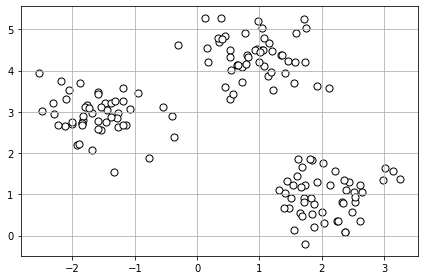

In [11]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1],
           c='white', marker='o', edgecolor='black',
           s=50)

plt.grid()
plt.tight_layout()
plt.show()

### k-평균 알고리즘

- 목표: 특성의 유사도에 기초하여 샘플을 그룹으로 모으는 것<br>

> - 1. 샘플 포인트에서 랜덤하게 k개의 센트로이드를 초기 클러스터 중심으로 선택함.<br>
> - 2. 각 샘플을 가장 가까운 센트로이드에 할당함<br>
> - 3. 할당된 샘플들의 중심으로 센트로이드를 이동함<br>
> - 4. 클러스터 할당이 변하지 않거나 사용자가 지정한 허용 오차나 최대 반복 횟수에 도달할 때 까지<br>
       단계 2와 3을 반복함
       
샘플 간의 유사도 측정법: 유클리디안 거리의 제곱


In [12]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, init='random',
           n_init=10, max_iter=300, tol=1e-04,
           random_state=0)

# 클러스터 레이블
y_km = km.fit_predict(X)

k-평균의 한 가지 문제는 하나 이상의 클러스터가 비어 있을 수 있다는 것임.

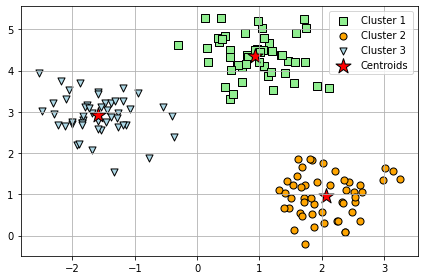

In [13]:
plt.scatter(X[y_km==0, 0],
           X[y_km==0, 1],
           s=50, c='lightgreen',
           marker='s', edgecolor='black',
           label='Cluster 1')

plt.scatter(X[y_km==1, 0],
           X[y_km==1, 1],
           s=50, c='orange',
           marker='o', edgecolor='black',
           label='Cluster 2')

plt.scatter(X[y_km==2, 0],
           X[y_km==2, 1],
           s=50, c='lightblue',
           marker='v', edgecolor='black',
           label='Cluster 3')

plt.scatter(km.cluster_centers_[:, 0],
           km.cluster_centers_[:, 1],
           s=250, marker='*',
           c='red', edgecolor='black',
           label='Centroids')

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

k-평균 알고리즘의 단점: 사전에 개수 k를 지정해야 함

> k-평균++: 초기 클러스터 중심을 똑똑하게 할당하여 군집 결과의 품질을 크게 향상함

## k-평균++ 초기화

> 1. 선택한 k개의 센트로이드를 저장할 빈 집합M을 초기화함<br>
> 2. 입력 샘플에서 첫 번째 센트로이드를 랜덤하게 선택하고 M에 할당함<br>
> 3. M에 있지 않은 각 샘플$x^i $에 대해 M에 있는 센트로이드까지 최소 제곱 거리$d(x^i, M)^2$를 찾을 수 있음<br>
> 4. 다음 식과 같은 가중치가 적용된 확률 분포를 사용하여 다음 센트로이드를 랜덤하게 선택함<br>
> 5. k개의 센트로이드를 선택할 때까지 단계 3과 4를 반복함<br>
> 6. 그다음 기본 k-평균 알고리즘을 수행함<br>


### 직접 군집 vs 간접 군집

- 직접 군집: 데이터셋의 샘플이 정확히 하나의 클라스터에 할당되는 알고리즘 종류<br>
- 간접 군집: 샘플을 하나 이상의 클라스터에 할당함.<br>

### FCM 알고리즘

> 1. 센트로이드 개수 k를 지정하고 랜덤하게 각 포인트에 대해 클러스터 확률을 할당함<br>
> 2. 클러스터 센트로이드를 계산함<br>
> 3. 각 샘플에 대해 클러스터 소속 확률을 업데이트함<br>
> 4. 클러스터 확률이 변하지 않거나 사용자가 지정한 허용 오차나 최대 반복 횟수에 도달할 때까지
     단계 2와 3을 반복함<br>
     


In [14]:
print('왜곡: %.2f' % km.inertia_)

왜곡: 72.48


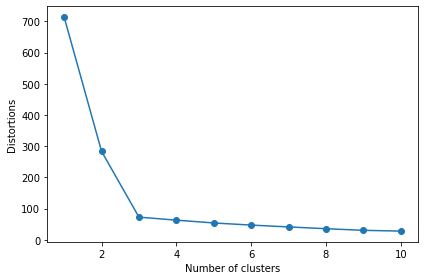

In [15]:
distortions = []

for i in range(1, 11):
    km = KMeans(n_clusters=i,
               init='k-means++',
               n_init=10,
               max_iter=300,
               random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
    
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortions')
plt.tight_layout()
plt.show()

k가 증가하면 왜곡은 줄어듦, 샘플이 할당된센트로이드에 더 가까워지기 때문에(SSE를 바탕)

### 실루엣 그래프로 군집 품질을 정량화

실루엣 계수

> 1. 샘플 $x^i$와 동일한 클러스터 내 모든 다른 포인트 사이의 거리를 평균하여 클러스터 응집력 $a^i$를 계산함<br>
> 2. 샘픔 $x^i$와 가장 가까운 클러스터의 모든 샘플 간 평균 거리로 최근접 클러스터의 클러스터 분리도 $b^i$를 계산함<br>
> 3. 클러스터 응집력과 분리도 사이의 차이를 둘 중 큰 값으로 나누어 실루엣 $s^i$를 다음과 같이 계산함<br>

-> $s^i = b^i - a^i / max(b^i, a^i)$

실루엣 계수는 -1과 1사이 값을 가짐


In [16]:
km = KMeans(n_clusters=3, init='k-means++',
           n_init=10, max_iter=300, tol=1e-04, random_state=0)

y_km = km.fit_predict(X)

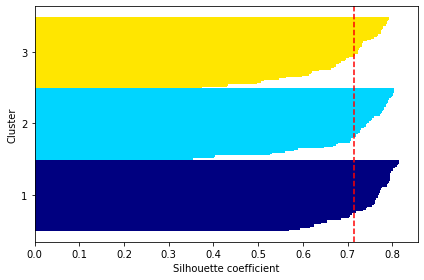

In [20]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
# plt.savefig('images/11_04.png', dpi=300)
plt.show()

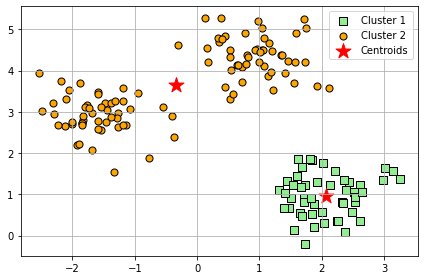

In [21]:
km = KMeans(n_clusters=2,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50,
            c='lightgreen',
            edgecolor='black',
            marker='s',
            label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50,
            c='orange',
            edgecolor='black',
            marker='o',
            label='Cluster 2')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=250, marker='*', c='red', label='Centroids')
plt.legend()
plt.grid()
plt.tight_layout()
# plt.savefig('images/11_05.png', dpi=300)
plt.show()


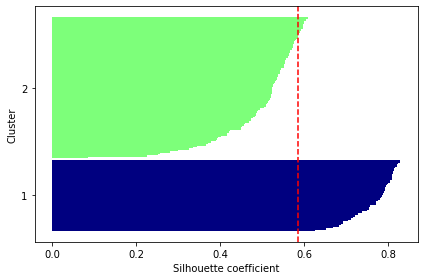

In [22]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
# plt.savefig('images/11_06.png', dpi=300)
plt.show()